# Predicción de la Evapotranspiración utilizando el valor anterior

Este notebook se ha relaizado para intentar disminuir el error obtenido en el anterior, se prueban diferentes modelos de regesión lineal, árboles y redes neuronales, para ver como es el resultado.

En el mejor modelo obtenemos un RMSE de 0,54 y con el realizamos las predicciones a 5 días y guardamos los resultados para su posterior comprobación. Hay que tener en cuenta que las predicciones que se obtienen de la AEMET y con las cuales se hace la predicción varían con el resultado real, por tanto hay que tener en cuenta que ya partimos de un error a la hora de obtención de los datos, ya que es muy difícil la previsión exacta cuando hablamos de variables climáticas.

Aun así el objetivo de esta práctica era el de enfrentarse a un problema real y el resultado ha sido más que satisfactorio.

Por último comentar que las previsiones a 5 días se guardan en la carpeta [predicciones](predicciones), y las previsiones acumuladas a un día se almacenan en el fichero [PrediccionesAcumulado.txt](PrediccionesAcumulado.txt)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from datetime import datetime
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
data = pd.read_csv('losnavalmoralesFull.csv',sep=';',encoding='utf_16_le' )
#data = pd.read_csv('losnavalmorales.csv',sep=';',encoding='utf_16_le' )  #Version con datos sin tratar, comentar el de arriba
data.head(5)

,Fecha,Temp Media (ºC),Temp Max (ºC),Temp Mínima (ºC),Humedad Media (%),Humedad Max (%),Humedad Min (%),Radiación (MJ/m2),Precipitación (mm),PePMon,EtPMon
0,2001-01-01,9.36,11.89,7.64,86.0,95.9,77.70,3.77,6.8,3.26,0.99
1,2001-01-02,7.78,10.22,6.11,78.8,92.8,62.15,6.92,7.2,3.56,1.37
2,2001-01-03,7.90,9.70,6.18,82.3,90.3,72.50,3.77,3.4,0.52,1.10
3,2001-01-04,10.25,12.36,8.69,76.3,88.5,63.95,6.32,0.0,0.00,1.53
4,2001-01-05,13.12,15.54,8.83,85.7,94.9,77.90,3.75,4.6,1.52,1.31


In [3]:
data.tail(5)

,Fecha,Temp Media (ºC),Temp Max (ºC),Temp Mínima (ºC),Humedad Media (%),Humedad Max (%),Humedad Min (%),Radiación (MJ/m2),Precipitación (mm),PePMon,EtPMon
6261,2018-04-06,12.49,17.95,7.67,70.0,87.3,51.29,10.96,0.98,0.00,2.39
6262,2018-04-07,7.59,12.17,5.61,87.8,97.9,61.31,10.56,7.45,3.76,1.76
6263,2018-04-08,8.48,12.84,5.41,80.8,97.3,55.71,18.20,0.59,0.00,2.56
6264,2018-04-09,4.78,6.27,2.55,85.8,95.5,76.30,9.53,1.47,0.00,1.26
6265,2018-04-10,5.32,8.74,3.02,88.9,95.1,75.70,5.18,8.82,4.77,1.15


In [4]:
data['Fecha']= pd.to_datetime(data.Fecha, format='%Y/%m/%d')
#dataUpdate =dataUpdate.drop(["IdProvincia","IdEstacion","Año","Dia"],axis=1); # Version con datos sin tratar, descomentar.
cols = data.columns[data.dtypes.eq('object')]
for i in cols:
    data[i] = pd.to_numeric(data[i].str.replace(',', '.'))

data = data.fillna(method='ffill')
data = data.set_index('Fecha');
data.dtypes 

Temp Media (ºC)       float64
Temp Max (ºC)         float64
Temp Mínima (ºC)      float64
Humedad Media (%)     float64
Humedad Max (%)       float64
Humedad Min (%)       float64
Radiación (MJ/m2)     float64
Precipitación (mm)    float64
PePMon                float64
EtPMon                float64
dtype: object

In [5]:
elements = data['Precipitación (mm)'].values
elements_ok = [1 if element > 0 else 0 for element in elements]
data['Precipitación (mm)'] = elements_ok
data['EtPMonAnterior'] = data['EtPMon']
data['EtPMonAnterior'][1:] = data['EtPMon'][0:-1]
labels=data["EtPMon"][1:]
data_red = data.drop(['Radiación (MJ/m2)','PePMon'],axis=1);
data_red.to_csv('losnavalmoralesFullEtOAnterior.csv',sep=';',encoding='utf_16_le')
data_red = data.drop(['Radiación (MJ/m2)','PePMon','EtPMon'],axis=1);
data_red = data_red.drop(data_red.index[0])
data_red.tail(3)


C:\Users\Pablo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Temp Media (ºC),Temp Max (ºC),Temp Mínima (ºC),Humedad Media (%),Humedad Max (%),Humedad Min (%),Precipitación (mm),EtPMonAnterior
Fecha,,,,,,,,
2018-04-08,8.48,12.84,5.41,80.8,97.3,55.71,1,1.76
2018-04-09,4.78,6.27,2.55,85.8,95.5,76.30,1,2.56
2018-04-10,5.32,8.74,3.02,88.9,95.1,75.70,1,1.26


### Regresión lineal

In [6]:
X_train,X_test,Y_train,Y_test = train_test_split(data_red,labels,test_size=0.20,random_state=20)
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)
prediction = regr.predict(X_test)
print("Root Mean squared error: %.2f"
      % sqrt(mean_squared_error(Y_test, prediction)))
print('Variance score: %.2f' % r2_score(Y_test, prediction))

Root Mean squared error: 0.59
Variance score: 0.94


### Elastic Net

In [7]:
from sklearn.linear_model import ElasticNet
regr = ElasticNet(random_state=0)
regr.fit(X_train, Y_train)
prediction = regr.predict(X_test)
print("Root Mean squared error: %.2f"
      % sqrt(mean_squared_error(Y_test, prediction)))
print('Variance score: %.2f' % r2_score(Y_test, prediction))

Root Mean squared error: 0.76
Variance score: 0.90


### Ridge


In [8]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf.fit(X_train, Y_train) 
prediction = clf.predict(X_test)
print("Root Mean squared error: %.2f"
      % sqrt(mean_squared_error(Y_test, prediction)))
print('Variance score: %.2f' % r2_score(Y_test, prediction))

Root Mean squared error: 0.59
Variance score: 0.94


### Lasso

In [9]:
regr = linear_model.Lasso(alpha=0.1)
regr.fit(X_train, Y_train)
prediction = regr.predict(X_test)
print("Root Mean squared error: %.2f"
      % sqrt(mean_squared_error(Y_test, prediction)))
print('Variance score: %.2f' % r2_score(Y_test, prediction))

Root Mean squared error: 0.60
Variance score: 0.94


### Árboles de decisión


In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#regressor = DecisionTreeRegressor(random_state=0)
regressor = RandomForestRegressor(criterion='mse')
regressor.fit(X_train,Y_train)
modelPred = regressor.predict(X_test)
meanSquaredError=mean_squared_error(Y_test, modelPred)
print("MSE:", meanSquaredError)
rootMeanSquaredError = sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError)
print('Variance score: %.2f' % r2_score(Y_test, modelPred))

MSE: 0.28999526656
RMSE: 0.5385120858070461
Variance score: 0.95


In [11]:
testplot = Y_test.reset_index()
testplot=testplot.drop(['Fecha'],axis=1);
modelPred2 = pd.DataFrame(modelPred)

### Hyperparameters tunning

In [12]:
from sklearn.model_selection import cross_val_score, cross_val_predict
scores = cross_val_score(regressor, data_red, labels, cv=10,scoring='neg_mean_squared_error')
sqrt(- scores.mean())

0.5593061756306723

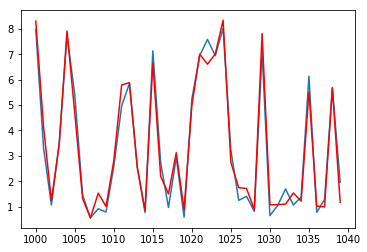

In [13]:
# plot
i= 1000
j= 1040
plt.plot(testplot[i:j])
plt.plot(modelPred2[i:j], color='red')
plt.show()


### Redes Neuronales

In [14]:
from sklearn.neural_network import MLPRegressor
clf = MLPRegressor(
    hidden_layer_sizes=(10,),  activation='relu', solver='adam', alpha=0.001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=100000, shuffle=True,
    random_state=9, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

clf.fit(X_train, Y_train)
modelPred = clf.predict(X_test)
meanSquaredError=mean_squared_error(Y_test, modelPred)
print("MSE:", meanSquaredError)
rootMeanSquaredError = sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError)
print('Variance score: %.2f' % r2_score(Y_test, modelPred))
modelPred

MSE: 0.353799820274
RMSE: 0.594810743240174
Variance score: 0.94


array([ 1.23496157,  2.50293084,  5.18389716, ...,  4.8231965 ,
        1.69428587,  3.40902951])

### WebScrapping Aemet

In [15]:
from lxml import etree
doc = etree.parse('http://www.aemet.es/xml/municipios/localidad_45112.xml')
raiz=doc.getroot()
prediccion = raiz[4]
#dia = prediccion[1] # Para coger la prevision de mañana.
dia = prediccion[0] # Para coger la prevision de hoy.
fecha=dia.get('fecha')
temperatura=dia.find("temperatura")
probprecipitacion=dia.find("prob_precipitacion")
temperaturaMax=float(temperatura.find("maxima").text)
temperaturaMin=float(temperatura.find("minima").text)
humedad=dia.find("humedad_relativa")
humedadMax=float(humedad.find("maxima").text)
humedadMin=float(humedad.find("minima").text)
humedadMed=((humedadMax)+(humedadMin))/2
temperaturaMed=((temperaturaMax)+(temperaturaMin))/2
precipitacion= 0 if probprecipitacion.text == None else int(probprecipitacion.text)
precipitaciondummy = 1 if precipitacion > 60 else 0
print("Prevision: ",fecha)
print("Temperatura Max:",temperaturaMax)
print("Temperatura Min:",temperaturaMin)
print("Temperatura Med:",temperaturaMed)
print("Humedad Max:",humedadMax)
print("Humedad Min:",humedadMin)
print("Humedad Med:",humedadMed)
print("Precipitacion:",precipitaciondummy)


Prevision:  2018-04-11
Temperatura Max: 13.0
Temperatura Min: 2.0
Temperatura Med: 7.5
Humedad Max: 95.0
Humedad Min: 40.0
Humedad Med: 67.5
Precipitacion: 0


In [16]:
#TODO Coger por indice
etAnterior = data['EtPMon'][-1]
etAnterior

1.1499999999999999

In [17]:
d = pd.DataFrame.from_items([(fecha,[temperaturaMed,temperaturaMax,temperaturaMin,humedadMed,humedadMax,humedadMin,precipitaciondummy,etAnterior])],orient='index', columns=(['Temp Media (ºC)','Temp Max (ºC)','Temp Minima (ºC)','Humedad Media (%)','Humedad Max (%)','Humedad Min (%)','Precipitación (mm)','EtPMonAnterior']))
d.dtypes
d

,Temp Media (ºC),Temp Max (ºC),Temp Minima (ºC),Humedad Media (%),Humedad Max (%),Humedad Min (%),Precipitación (mm),EtPMonAnterior
2018-04-11,7.5,13.0,2.0,67.5,95.0,40.0,0,1.15


In [18]:
regressor = RandomForestRegressor(criterion='mse')
regressor.fit(X_train,Y_train)
prediction = regressor.predict(d)
print("Prediccion de la evapotranspiracion de referencia para el dia",fecha,":",prediction[0])

Prediccion de la evapotranspiracion de referencia para el dia 2018-04-11 : 1.734


In [19]:
file = open("PrediccionesAcumulado.txt","a")
file.write("Prediccion de la evapotranspiracion de referencia para el dia "+str(fecha)+"; "+str(prediction[0]))
file.write("\n");
file.close()

In [20]:
indice = d.index[0]
indice =  "predicciones\\" + "prediccion" + indice + ".csv" #Windows
file = open(indice,"w")
file.write("Fecha;Temperatura Max;Temperatura Min;Temperatura Med;Humedad Max;Humedad Min;Humedad Med;Precipitacion;EvapotranspiracionAnterior;Prediccion"+"\n")
file.write(fecha+";")
file.write(str(temperaturaMax)+";")
file.write(str(temperaturaMin)+";")
file.write(str(temperaturaMed)+";")
file.write(str(humedadMax)+";")
file.write(str(humedadMin)+";")
file.write(str(humedadMed)+";")
file.write(str(precipitaciondummy)+";")
file.write(str(etAnterior)+";")
file.write(str(prediction[0]))
#file.write("Prevision: "+fecha+"\n")
#file.write("Temperatura Max: "+str(temperaturaMax)+"\n")
#file.write("Temperatura Min: "+str(temperaturaMin)+"\n")
#file.write("Temperatura Med: "+str(temperaturaMed)+"\n")
#file.write("Humedad Max: "+str(humedadMax)+"\n")
#file.write("Humedad Min: "+str(humedadMin)+"\n")
#file.write("Humedad Med: "+str(humedadMed)+"\n")
#file.write("Precipitacion: "+str(precipitaciondummy)+"\n")
#file.write("Evapotranspiracion del dia anterior: "+str(etAnterior)+"\n")
#file.write("Prediccion de la evapotranspiracion de referencia para el dia "+fecha+" : "+str(prediction[0])+"\n")
file.write("\n");

# Test

In [21]:
from lxml import etree
doc = etree.parse('http://www.aemet.es/xml/municipios/localidad_45112.xml')
raiz=doc.getroot()
prediccion = raiz[4]
#dia = prediccion[1] # Para coger la prevision de mañana.
for i in range(5):
    dia = prediccion[i+1] # Para coger la prevision de hoy.
    fecha=dia.get('fecha')
    temperatura=dia.find("temperatura")
    probprecipitacion=dia.find("prob_precipitacion")
    temperaturaMax=float(temperatura.find("maxima").text)
    temperaturaMin=float(temperatura.find("minima").text)
    humedad=dia.find("humedad_relativa")
    humedadMax=float(humedad.find("maxima").text)
    humedadMin=float(humedad.find("minima").text)
    humedadMed=((humedadMax)+(humedadMin))/2
    temperaturaMed=((temperaturaMax)+(temperaturaMin))/2
    precipitacion=int(probprecipitacion.text)
    precipitaciondummy = 1 if precipitacion > 60 else 0
    print("Prevision: ",fecha)
    print("Temperatura Max:",temperaturaMax)
    print("Temperatura Min:",temperaturaMin)
    print("Temperatura Med:",temperaturaMed)
    print("Humedad Max:",humedadMax)
    print("Humedad Min:",humedadMin)
    print("Humedad Med:",humedadMed)
    print("Precipitacion:",precipitaciondummy)
    print("Evapotranspiracion del dia anterior:",prediction[0])
    
    file.write(fecha+";")
    file.write(str(temperaturaMax)+";")
    file.write(str(temperaturaMin)+";")
    file.write(str(temperaturaMed)+";")
    file.write(str(humedadMax)+";")
    file.write(str(humedadMin)+";")
    file.write(str(humedadMed)+";")
    file.write(str(precipitaciondummy)+";")
    file.write(str(prediction[0])+";")
    
    
    #file.write("Prevision: "+fecha+"\n")
    #file.write("Temperatura Max: "+str(temperaturaMax)+"\n")
    #file.write("Temperatura Min: "+str(temperaturaMin)+"\n")
    #file.write("Temperatura Med: "+str(temperaturaMed)+"\n")
    #file.write("Humedad Max: "+str(humedadMax)+"\n")
    #file.write("Humedad Min: "+str(humedadMin)+"\n")
    #file.write("Humedad Med: "+str(humedadMed)+"\n")
    #file.write("Precipitacion: "+str(precipitaciondummy)+"\n")
    #file.write("Evapotranspiracion del dia anterior: "+str(prediction[0])+"\n")
    d = pd.DataFrame.from_items([(fecha,[temperaturaMed,temperaturaMax,temperaturaMin,humedadMed,humedadMax,humedadMin,precipitaciondummy,prediction])],orient='index', columns=(['Temp Media (ºC)','Temp Max (ºC)','Temp Minima (ºC)','Humedad Media (%)','Humedad Max (%)','Humedad Min (%)','Precipitación (mm)','EtPMonAnterior']))
    d.dtypes
    d
    regr = linear_model.LinearRegression()
    regr.fit(X_train, Y_train)
    prediction = regr.predict(d)
    print("Prediccion de la evapotranspiracion de referencia para el dia",fecha,":",prediction[0])
    print("\n")
    
    file.write(str(prediction[0]))
    #file.write("Prediccion de la evapotranspiracion de referencia para el dia "+fecha+" : "+str(prediction[0])+"\n")
    file.write("\n")

file.close()


Prevision:  2018-04-12
Temperatura Max: 12.0
Temperatura Min: 5.0
Temperatura Med: 8.5
Humedad Max: 95.0
Humedad Min: 60.0
Humedad Med: 77.5
Precipitacion: 1
Evapotranspiracion del dia anterior: 1.734
Prediccion de la evapotranspiracion de referencia para el dia 2018-04-12 : 1.54235123772


Prevision:  2018-04-13
Temperatura Max: 12.0
Temperatura Min: 5.0
Temperatura Med: 8.5
Humedad Max: 95.0
Humedad Min: 60.0
Humedad Med: 77.5
Precipitacion: 1
Evapotranspiracion del dia anterior: 1.54235123772
Prediccion de la evapotranspiracion de referencia para el dia 2018-04-13 : 1.44387723485


Prevision:  2018-04-14
Temperatura Max: 15.0
Temperatura Min: 5.0
Temperatura Med: 10.0
Humedad Max: 95.0
Humedad Min: 45.0
Humedad Med: 70.0
Precipitacion: 0
Evapotranspiracion del dia anterior: 1.44387723485
Prediccion de la evapotranspiracion de referencia para el dia 2018-04-14 : 1.96797059118


Prevision:  2018-04-15
Temperatura Max: 19.0
Temperatura Min: 6.0
Temperatura Med: 12.5
Humedad Max: 85.0
H

In [22]:
predicciones = pd.read_csv(indice,sep=';')
predicciones

,Fecha,Temperatura Max,Temperatura Min,Temperatura Med,Humedad Max,Humedad Min,Humedad Med,Precipitacion,EvapotranspiracionAnterior,Prediccion
0,2018-04-11,13.0,2.0,7.5,95.0,40.0,67.5,0,1.150000,1.734000
1,2018-04-12,12.0,5.0,8.5,95.0,60.0,77.5,1,1.734000,1.542351
2,2018-04-13,12.0,5.0,8.5,95.0,60.0,77.5,1,1.542351,1.443877
3,2018-04-14,15.0,5.0,10.0,95.0,45.0,70.0,0,1.443877,1.967971
4,2018-04-15,19.0,6.0,12.5,85.0,50.0,67.5,0,1.967971,2.538343
5,2018-04-16,18.0,10.0,14.0,90.0,55.0,72.5,1,2.538343,2.534467
